In [73]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
from sim.netrual import Component, NLT_reserve, NLT_components  # noqa
from sim.data import get_batch_price
import pandas as pd


## Prepare market Data

In [75]:
target = ['EOS', 'OMG', 'ELF', 'ETH', 'INS', 'MANA', 'IOST', 'ARK']

In [76]:
market_prices = get_batch_price(target)
m = market_prices
m.head()

,EOS,timestamp,OMG,ELF,ETH,INS,MANA,IOST,ARK
0,9.513628,1.517762e+09,12.220460,1.424711,872.89,2.778753,0.101204,0.041005,4.420315
1,9.571649,1.517762e+09,12.150611,1.428336,872.45,2.767728,0.100280,0.040984,4.418087
2,9.503056,1.517762e+09,12.242008,1.422520,872.00,2.715798,0.098882,0.040767,4.403600
3,9.447612,1.517763e+09,12.094019,1.414750,867.39,2.718675,0.099569,0.040694,4.351696
4,9.428780,1.517763e+09,12.042690,1.434984,865.82,2.747469,0.098874,0.041125,4.343819


## Inital Components

In [77]:
_ = [Component(t) for t in market_prices.columns if t != 'timestamp']
NLT_components

{'ARK': 0.0 ARK => 0 NTL,
 'ELF': 0.0 ELF => 0 NTL,
 'EOS': 0.0 EOS => 0 NTL,
 'ETH': 0.0 ETH => 0 NTL,
 'INS': 0.0 INS => 0 NTL,
 'IOST': 0.0 IOST => 0 NTL,
 'MANA': 0.0 MANA => 0 NTL,
 'OMG': 0.0 OMG => 0 NTL}

## Warm-up with a Rational Auction

In [78]:
import random

#### Set time to A Cycle before

In [79]:
begin = m.timestamp[0] - Component.auction_window -1

In [80]:
{k: v.minted for k, v in NLT_components.items()}

{'ARK': {},
 'ELF': {},
 'EOS': {},
 'ETH': {},
 'INS': {},
 'IOST': {},
 'MANA': {},
 'OMG': {}}

In [81]:
sender = 'satoshi'


for c in NLT_components.values():
    res = c(begin).auction(sender, (15 / float(m.T[0][c.token])) * 1000)
    print(res)


True
True
True
True
True
True
True
True


#### Check status of Auctions:

In [82]:
{k: v.minted for k, v in NLT_components.items()}

{'ARK': {0: {'bid': 3393.423350086348, 'sender': 'satoshi'}},
 'ELF': {0: {'bid': 10528.452141710017, 'sender': 'satoshi'}},
 'EOS': {0: {'bid': 1576.685553246836, 'sender': 'satoshi'}},
 'ETH': {0: {'bid': 17.184295844837266, 'sender': 'satoshi'}},
 'INS': {0: {'bid': 5398.1043476962195, 'sender': 'satoshi'}},
 'IOST': {0: {'bid': 365807.70951941406, 'sender': 'satoshi'}},
 'MANA': {0: {'bid': 148215.1926501074, 'sender': 'satoshi'}},
 'OMG': {0: {'bid': 1227.4497032026618, 'sender': 'satoshi'}}}

#### Time Jumps to Now:

In [83]:
[c(m.timestamp[0]) for c in NLT_components.values()]

EOS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1000}
OMG:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2000}
ELF:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 3000}
ETH:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 4000}
INS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 5000}
MANA:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 6000}
IOST:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 7000}
ARK:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 8000}


[1576.685553246836 EOS => 8000 NTL,
 1227.4497032026618 OMG => 8000 NTL,
 10528.452141710017 ELF => 8000 NTL,
 17.184295844837266 ETH => 8000 NTL,
 5398.1043476962195 INS => 8000 NTL,
 148215.1926501074 MANA => 8000 NTL,
 365807.70951941406 IOST => 8000 NTL,
 3393.423350086348 ARK => 8000 NTL]

### Calcu the Price of NLT

In [84]:
from sim.utils import nlt_value, highest, nlt_price

In [85]:
m.T[0]

EOS          9.513628e+00
timestamp    1.517762e+09
OMG          1.222046e+01
ELF          1.424711e+00
ETH          8.728900e+02
INS          2.778753e+00
MANA         1.012042e-01
IOST         4.100515e-02
ARK          4.420315e+00
Name: 0, dtype: float64

In [86]:
highest(m.T[0])

'INS'

In [87]:
nlt_value(m.T[0])

15000.000000000002

In [88]:
price = nlt_price(m.T[0])
price

15.000000000000002

### Find Tokens that Price is Lower than NLT


\begin{gather*}
Price_{NLT} > \frac{Price_{Token} \times NLT_{min bid}}{1000}
\end{gather*}

In [89]:
from sim.utils import get_worth_to_auction
m_t = {k: v for k, v in m.T[0].items() if k != 'timestamp'}

In [94]:
worth = get_worth_to_auction(m_t)
worth

{'ARK': 4.42031496,
 'ELF': 1.42471085,
 'EOS': 9.513628109999999,
 'ETH': 872.89,
 'IOST': 0.04100515,
 'MANA': 0.1012042,
 'OMG': 12.22046}

### Determin how many to Auction:



In [95]:
{k: price * 1000 / v for k, v in worth.items()}

{'ARK': 3393.4233500863484,
 'ELF': 10528.452141710019,
 'EOS': 1576.6855532468362,
 'ETH': 17.184295844837266,
 'IOST': 365807.70951941411,
 'MANA': 148215.19265010743,
 'OMG': 1227.449703202662}

In [96]:
from sim.utils import determin_auction_quantity, check_min_bid

In [97]:
determin_auction_quantity(m_t)

{'ARK': 3393.4233500863484,
 'ELF': 10528.452141710019,
 'EOS': 1576.6855532468362,
 'ETH': 17.184295844837266,
 'IOST': 365807.7095194141,
 'MANA': 148215.19265010743,
 'OMG': 1227.449703202662}

### Determin how many NLT to Redeem

\begin{gather*}
Price_{NLT} < \frac{Price_{Token} \times NLT_{min bid}}{1000}
\end{gather*}

In [98]:
from sim.utils import get_worth_to_redeem, determin_redeem_quantity

In [107]:
get_worth_to_redeem(m_t)

{}

In [100]:
determin_redeem_quantity(m_t)

{}

In [112]:
{
    k: v * NLT_components[k].min_bid / 1000 for k, v in m_t.items()
}


{'ARK': 15.0,
 'ELF': 15.0,
 'EOS': 15.0,
 'ETH': 15.0,
 'INS': 15.000000000000002,
 'IOST': 15.0,
 'MANA': 14.999999999999998,
 'OMG': 15.0}

In [101]:
eth = NLT_components['ETH']

In [102]:
eth.min_bid # for 1000 nlt

17.184295844837266

In [113]:
nlt_price(m_t)

15.000000000000002

In [104]:
eth.get_redeem_rate(1000) * m_t['ETH']

15.0

In [105]:
import operator
min({
    t: float(p) * NLT_components[t].min_bid
        # t: NLT_reserve[t] * float(p)
    for t, p in m_t.items()
    if t != 'timestamp'
}, key=operator.itemgetter(1))

'MANA'

In [106]:
NLT_components['MANA'].min_bid 

148215.1926501074

## Composed Simulation

In [11]:
from sim.utils import redeem_strategy, auction_strategy
from sim.simulator import sim_loop
import random

In [12]:
res = sim_loop(m)

inital bid 59.0
True
inital bid 9.0
True
inital bid 34.0
True
inital bid 41.0
True
inital bid 66.0
True
inital bid 75.0
True
inital bid 13.0
True
inital bid 52.0
True
EOS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 9000}
OMG:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 10000}
ELF:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 11000}
ETH:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 12000}
INS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 13000}
MANA:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 14000}
IOST:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 15000}
ARK:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 16000}
PRICE OF NLT 20.36743333333333
plan to aucthon {'ETH': 7.0}, pla

plan to aucthon {'EOS': 54.69837584151894, 'OMG': 42.87754740543375, 'ETH': 0.5962122966725564, 'INS': 185.70055338988027}, plan to redeem {'EOS': 0.1823279194717298, 'OMG': 0.1429251580181125, 'ETH': 0.001987374322241855, 'INS': 0.6190018446329342, 'ARK': 0.3977134925438973} for
Redeeming Current accounts {'satoshi': 72985.65479264851}, redeem 0.1823279194717298 for satoshi
Redeem Finished Current accounts {'satoshi': 72985.47246472904}
Redeeming Current accounts {'satoshi': 72985.47246472904}, redeem 0.1429251580181125 for satoshi
Redeem Finished Current accounts {'satoshi': 72985.32953957103}
Redeeming Current accounts {'satoshi': 72985.32953957103}, redeem 0.001987374322241855 for satoshi
Redeem Finished Current accounts {'satoshi': 72985.3275521967}
Redeeming Current accounts {'satoshi': 72985.3275521967}, redeem 0.6190018446329342 for satoshi
Redeem Finished Current accounts {'satoshi': 72984.70855035206}
Redeeming Current accounts {'satoshi': 72984.70855035206}, redeem 0.3977134

plan to aucthon {'EOS': 60.42074910159773, 'OMG': 46.03506285567213, 'ETH': 0.6417287762080695, 'INS': 207.4618683259599, 'ARK': 129.27654637551763}, plan to redeem {'EOS': 0.20140249700532575, 'OMG': 0.1534502095189071, 'ETH': 0.002139095920693565, 'INS': 0.6915395610865329, 'ARK': 0.4309218212517254} for
Redeeming Current accounts {'satoshi': 154961.74145354467}, redeem 0.20140249700532575 for satoshi
Redeem Finished Current accounts {'satoshi': 154961.54005104766}
Redeeming Current accounts {'satoshi': 154961.54005104766}, redeem 0.1534502095189071 for satoshi
Redeem Finished Current accounts {'satoshi': 154961.38660083813}
Redeeming Current accounts {'satoshi': 154961.38660083813}, redeem 0.002139095920693565 for satoshi
Redeem Finished Current accounts {'satoshi': 154961.38446174221}
Redeeming Current accounts {'satoshi': 154961.38446174221}, redeem 0.6915395610865329 for satoshi
Redeem Finished Current accounts {'satoshi': 154960.69292218113}
Redeeming Current accounts {'satoshi'

plan to aucthon {'EOS': 68.39387642818747, 'OMG': 52.194058719890556, 'ETH': 0.7408424694701267, 'INS': 235.55464285223178, 'ARK': 149.60469900446822}, plan to redeem {'EOS': 0.22797958809395824, 'OMG': 0.17398019573296852, 'ETH': 0.0024694748982337553, 'INS': 0.7851821428407726, 'ARK': 0.49868233001489404} for
Redeeming Current accounts {'satoshi': 238935.06464233063}, redeem 0.22797958809395824 for satoshi
Redeem Finished Current accounts {'satoshi': 238934.83666274254}
Redeeming Current accounts {'satoshi': 238934.83666274254}, redeem 0.17398019573296852 for satoshi
Redeem Finished Current accounts {'satoshi': 238934.6626825468}
Redeeming Current accounts {'satoshi': 238934.6626825468}, redeem 0.0024694748982337553 for satoshi
Redeem Finished Current accounts {'satoshi': 238934.6602130719}
Redeeming Current accounts {'satoshi': 238934.6602130719}, redeem 0.7851821428407726 for satoshi
Redeem Finished Current accounts {'satoshi': 238933.87503092908}
Redeeming Current accounts {'satos

plan to aucthon {'EOS': 78.9257296088001, 'OMG': 59.51941026435501, 'ETH': 0.8416639805482441, 'INS': 268.355296341877, 'ARK': 168.26548991368335}, plan to redeem {'EOS': 0.263085765362667, 'OMG': 0.19839803421451668, 'ETH': 0.00280554660182748, 'INS': 0.8945176544729234, 'ARK': 0.5608849663789445} for
Redeeming Current accounts {'satoshi': 321904.35174676613}, redeem 0.263085765362667 for satoshi
Redeem Finished Current accounts {'satoshi': 321904.0886610008}
Redeeming Current accounts {'satoshi': 321904.0886610008}, redeem 0.19839803421451668 for satoshi
Redeem Finished Current accounts {'satoshi': 321903.89026296657}
Redeeming Current accounts {'satoshi': 321903.89026296657}, redeem 0.00280554660182748 for satoshi
Redeem Finished Current accounts {'satoshi': 321903.88745741994}
Redeeming Current accounts {'satoshi': 321903.88745741994}, redeem 0.8945176544729234 for satoshi
Redeem Finished Current accounts {'satoshi': 321902.99293976545}
Redeeming Current accounts {'satoshi': 321902

plan to aucthon {'EOS': 88.47079288158908, 'OMG': 67.78309109982186, 'ETH': 0.9519457314058982, 'ARK': 189.4419365981887}, plan to redeem {'EOS': 0.2949026429386302, 'OMG': 0.2259436369994062, 'ETH': 0.0031731524380196607, 'ARK': 0.6314731219939623} for
Redeeming Current accounts {'satoshi': 404871.4930471624}, redeem 0.2949026429386302 for satoshi
Redeem Finished Current accounts {'satoshi': 404871.19814451947}
Redeeming Current accounts {'satoshi': 404871.19814451947}, redeem 0.2259436369994062 for satoshi
Redeem Finished Current accounts {'satoshi': 404870.97220088245}
Redeeming Current accounts {'satoshi': 404870.97220088245}, redeem 0.0031731524380196607 for satoshi
Redeem Finished Current accounts {'satoshi': 404870.96902773}
Redeeming Current accounts {'satoshi': 404870.96902773}, redeem 0.6314731219939623 for satoshi
Redeem Finished Current accounts {'satoshi': 404870.337554608}
EOS:: New cycle 85
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 405870.337

plan to aucthon {'EOS': 91.79499290874509, 'OMG': 69.39780257886459, 'ETH': 0.9701812800525269, 'ARK': 192.84064401759628}, plan to redeem {'EOS': 0.30598330969581694, 'OMG': 0.23132600859621527, 'ETH': 0.0032339376001750894, 'ARK': 0.6428021467253209} for
Redeeming Current accounts {'satoshi': 466852.86073459964}, redeem 0.30598330969581694 for satoshi
Redeem Finished Current accounts {'satoshi': 466852.55475128995}
Redeeming Current accounts {'satoshi': 466852.55475128995}, redeem 0.23132600859621527 for satoshi
Redeem Finished Current accounts {'satoshi': 466852.3234252813}
Redeeming Current accounts {'satoshi': 466852.3234252813}, redeem 0.0032339376001750894 for satoshi
Redeem Finished Current accounts {'satoshi': 466852.3201913437}
Redeeming Current accounts {'satoshi': 466852.3201913437}, redeem 0.6428021467253209 for satoshi
Redeem Finished Current accounts {'satoshi': 466851.677389197}
EOS:: New cycle 101
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 4

plan to aucthon {'EOS': 95.24419429043009, 'OMG': 72.92608809566966, 'ETH': 1.004921493958328}, plan to redeem {'EOS': 0.31748064763476697, 'OMG': 0.24308696031889887, 'ETH': 0.0033497383131944267, 'ARK': 0.6760319501906008} for
Redeeming Current accounts {'satoshi': 528833.5721391297}, redeem 0.31748064763476697 for satoshi
Redeem Finished Current accounts {'satoshi': 528833.2546584822}
Redeeming Current accounts {'satoshi': 528833.2546584822}, redeem 0.24308696031889887 for satoshi
Redeem Finished Current accounts {'satoshi': 528833.0115715219}
Redeeming Current accounts {'satoshi': 528833.0115715219}, redeem 0.0033497383131944267 for satoshi
Redeem Finished Current accounts {'satoshi': 528833.0082217836}
Redeeming Current accounts {'satoshi': 528833.0082217836}, redeem 0.6760319501906008 for satoshi
Redeem Finished Current accounts {'satoshi': 528832.3321898334}
EOS:: New cycle 117
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 529832.3321898334}
OMG:: New cy

plan to aucthon {'EOS': 100.35616252075728, 'OMG': 76.32015486349702, 'ETH': 1.083746199061658, 'ARK': 220.90220119479366}, plan to redeem {'EOS': 0.3345205417358576, 'OMG': 0.25440051621165677, 'ETH': 0.0036124873302055263, 'ARK': 0.7363406706493122} for
Redeeming Current accounts {'satoshi': 590813.055067655}, redeem 0.3345205417358576 for satoshi
Redeem Finished Current accounts {'satoshi': 590812.7205471133}
Redeeming Current accounts {'satoshi': 590812.7205471133}, redeem 0.25440051621165677 for satoshi
Redeem Finished Current accounts {'satoshi': 590812.4661465972}
Redeeming Current accounts {'satoshi': 590812.4661465972}, redeem 0.0036124873302055263 for satoshi
Redeem Finished Current accounts {'satoshi': 590812.4625341098}
Redeeming Current accounts {'satoshi': 590812.4625341098}, redeem 0.7363406706493122 for satoshi
Redeem Finished Current accounts {'satoshi': 590811.7261934392}
EOS:: New cycle 133
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 591811

plan to aucthon {'EOS': 106.75728421537397, 'OMG': 82.10105415635101, 'ETH': 1.1499894655680085, 'ARK': 235.46057853562826}, plan to redeem {'EOS': 0.3558576140512466, 'OMG': 0.27367018052117004, 'ETH': 0.0038332982185600283, 'ARK': 0.7848685951187608} for
Redeeming Current accounts {'satoshi': 658789.5450511619}, redeem 0.3558576140512466 for satoshi
Redeem Finished Current accounts {'satoshi': 658789.1891935478}
Redeeming Current accounts {'satoshi': 658789.1891935478}, redeem 0.27367018052117004 for satoshi
Redeem Finished Current accounts {'satoshi': 658788.9155233674}
Redeeming Current accounts {'satoshi': 658788.9155233674}, redeem 0.0038332982185600283 for satoshi
Redeem Finished Current accounts {'satoshi': 658788.9116900691}
Redeeming Current accounts {'satoshi': 658788.9116900691}, redeem 0.7848685951187608 for satoshi
Redeem Finished Current accounts {'satoshi': 658788.126821474}
EOS:: New cycle 150
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 65978

plan to aucthon {'EOS': 114.88275825227741, 'OMG': 87.22805398582253, 'ETH': 1.2338408236294596, 'ARK': 249.26077245039588}, plan to redeem {'EOS': 0.3829425275075914, 'OMG': 0.2907601799527418, 'ETH': 0.004112802745431532, 'ARK': 0.8308692415013196} for
Redeeming Current accounts {'satoshi': 720766.300973461}, redeem 0.3829425275075914 for satoshi
Redeem Finished Current accounts {'satoshi': 720765.9180309335}
Redeeming Current accounts {'satoshi': 720765.9180309335}, redeem 0.2907601799527418 for satoshi
Redeem Finished Current accounts {'satoshi': 720765.6272707535}
Redeeming Current accounts {'satoshi': 720765.6272707535}, redeem 0.004112802745431532 for satoshi
Redeem Finished Current accounts {'satoshi': 720765.6231579507}
Redeeming Current accounts {'satoshi': 720765.6231579507}, redeem 0.8308692415013196 for satoshi
Redeem Finished Current accounts {'satoshi': 720764.7922887092}
EOS:: New cycle 166
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 721764.79

plan to aucthon {'EOS': 122.57774808693475, 'OMG': 94.9490007497961, 'ETH': 1.3189365694154176, 'ARK': 269.17072845212607}, plan to redeem {'EOS': 0.4085924936231158, 'OMG': 0.316496669165987, 'ETH': 0.004396455231384725, 'ARK': 0.8972357615070868} for
Redeeming Current accounts {'satoshi': 787739.8207997063}, redeem 0.4085924936231158 for satoshi
Redeem Finished Current accounts {'satoshi': 787739.4122072126}
Redeeming Current accounts {'satoshi': 787739.4122072126}, redeem 0.316496669165987 for satoshi
Redeem Finished Current accounts {'satoshi': 787739.0957105434}
Redeeming Current accounts {'satoshi': 787739.0957105434}, redeem 0.004396455231384725 for satoshi
Redeem Finished Current accounts {'satoshi': 787739.0913140882}
Redeeming Current accounts {'satoshi': 787739.0913140882}, redeem 0.8972357615070868 for satoshi
Redeem Finished Current accounts {'satoshi': 787738.1940783267}
EOS:: New cycle 183
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 788738.1940

plan to aucthon {'EOS': 127.57165281956202, 'OMG': 100.76216908536016, 'ETH': 1.3756051323533371, 'ARK': 287.36267648910325}, plan to redeem {'EOS': 0.4252388427318734, 'OMG': 0.3358738969512005, 'ETH': 0.00458535044117779, 'ARK': 0.9578755882970108} for
Redeeming Current accounts {'satoshi': 855711.2527096082}, redeem 0.4252388427318734 for satoshi
Redeem Finished Current accounts {'satoshi': 855710.8274707654}
Redeeming Current accounts {'satoshi': 855710.8274707654}, redeem 0.3358738969512005 for satoshi
Redeem Finished Current accounts {'satoshi': 855710.4915968685}
Redeeming Current accounts {'satoshi': 855710.4915968685}, redeem 0.00458535044117779 for satoshi
Redeem Finished Current accounts {'satoshi': 855710.4870115181}
Redeeming Current accounts {'satoshi': 855710.4870115181}, redeem 0.9578755882970108 for satoshi
Redeem Finished Current accounts {'satoshi': 855709.5291359298}
EOS:: New cycle 200
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 856709.52

plan to aucthon {'EOS': 134.80009443634333, 'OMG': 107.5223147371437, 'ETH': 1.4596154225567257}, plan to redeem {'EOS': 0.4493336481211444, 'OMG': 0.358407715790479, 'ETH': 0.0048653847418557526} for
Redeeming Current accounts {'satoshi': 916687.9511974287}, redeem 0.4493336481211444 for satoshi
Redeem Finished Current accounts {'satoshi': 916687.5018637807}
Redeeming Current accounts {'satoshi': 916687.5018637807}, redeem 0.358407715790479 for satoshi
Redeem Finished Current accounts {'satoshi': 916687.1434560649}
Redeeming Current accounts {'satoshi': 916687.1434560649}, redeem 0.0048653847418557526 for satoshi
Redeem Finished Current accounts {'satoshi': 916687.1385906801}
EOS:: New cycle 217
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 917687.1385906801}
OMG:: New cycle 217
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 918687.1385906801}
ELF:: New cycle 217
ETH:: New cycle 217
Found last Winner
sent 1000 NTL to satoshi
Current bal

plan to aucthon {'EOS': 139.37043844642287, 'OMG': 112.16612266542425, 'ETH': 1.5124479980205807}, plan to redeem {'EOS': 0.4645681281547429, 'OMG': 0.37388707555141415, 'ETH': 0.005041493326735269} for
Redeeming Current accounts {'satoshi': 964673.9054928451}, redeem 0.4645681281547429 for satoshi
Redeem Finished Current accounts {'satoshi': 964673.440924717}
Redeeming Current accounts {'satoshi': 964673.440924717}, redeem 0.37388707555141415 for satoshi
Redeem Finished Current accounts {'satoshi': 964673.0670376414}
Redeeming Current accounts {'satoshi': 964673.0670376414}, redeem 0.005041493326735269 for satoshi
Redeem Finished Current accounts {'satoshi': 964673.0619961481}
EOS:: New cycle 234
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 965673.0619961481}
OMG:: New cycle 234
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 966673.0619961481}
ELF:: New cycle 234
ETH:: New cycle 234
Found last Winner
sent 1000 NTL to satoshi
Current ba

plan to aucthon {'EOS': 142.6810750598195, 'OMG': 115.50272338963958, 'ETH': 1.5632138583553823}, plan to redeem {'EOS': 0.47560358353273163, 'OMG': 0.3850090779654653, 'ETH': 0.005210712861184607} for
Redeeming Current accounts {'satoshi': 1011659.4067639769}, redeem 0.47560358353273163 for satoshi
Redeem Finished Current accounts {'satoshi': 1011658.9311603934}
Redeeming Current accounts {'satoshi': 1011658.9311603934}, redeem 0.3850090779654653 for satoshi
Redeem Finished Current accounts {'satoshi': 1011658.5461513154}
Redeeming Current accounts {'satoshi': 1011658.5461513154}, redeem 0.005210712861184607 for satoshi
Redeem Finished Current accounts {'satoshi': 1011658.5409406025}
EOS:: New cycle 251
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1012658.5409406025}
OMG:: New cycle 251
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1013658.5409406025}
ELF:: New cycle 251
ETH:: New cycle 251
Found last Winner
sent 1000 NTL to satoshi
C

plan to aucthon {'EOS': 147.64560286928764, 'OMG': 120.16672017519649, 'ETH': 1.6199675546818237}, plan to redeem {'EOS': 0.49215200956429217, 'OMG': 0.40055573391732163, 'ETH': 0.005399891848939413} for
Redeeming Current accounts {'satoshi': 1059644.4459887226}, redeem 0.49215200956429217 for satoshi
Redeem Finished Current accounts {'satoshi': 1059643.953836713}
Redeeming Current accounts {'satoshi': 1059643.953836713}, redeem 0.40055573391732163 for satoshi
Redeem Finished Current accounts {'satoshi': 1059643.5532809792}
Redeeming Current accounts {'satoshi': 1059643.5532809792}, redeem 0.005399891848939413 for satoshi
Redeem Finished Current accounts {'satoshi': 1059643.5478810873}
EOS:: New cycle 268
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1060643.5478810873}
OMG:: New cycle 268
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1061643.5478810873}
ELF:: New cycle 268
ETH:: New cycle 268
Found last Winner
sent 1000 NTL to satoshi


plan to aucthon {'EOS': 153.09256833565186, 'OMG': 125.57928797107908, 'ETH': 1.6840182516921705}, plan to redeem {'EOS': 0.5103085611188395, 'OMG': 0.41859762657026356, 'ETH': 0.005613394172307234} for
Redeeming Current accounts {'satoshi': 1107628.9439783879}, redeem 0.5103085611188395 for satoshi
Redeem Finished Current accounts {'satoshi': 1107628.4336698267}
Redeeming Current accounts {'satoshi': 1107628.4336698267}, redeem 0.41859762657026356 for satoshi
Redeem Finished Current accounts {'satoshi': 1107628.0150722002}
Redeeming Current accounts {'satoshi': 1107628.0150722002}, redeem 0.005613394172307234 for satoshi
Redeem Finished Current accounts {'satoshi': 1107628.0094588061}
EOS:: New cycle 285
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1108628.0094588061}
OMG:: New cycle 285
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1109628.0094588061}
ELF:: New cycle 285
ETH:: New cycle 285
Found last Winner
sent 1000 NTL to satoshi


plan to aucthon {'EOS': 160.20821753566486, 'ETH': 1.7462695711387468}, plan to redeem {'EOS': 0.5340273917855496, 'OMG': 0.4319135245575788, 'ETH': 0.00582089857046249} for
Redeeming Current accounts {'satoshi': 1157612.7593556042}, redeem 0.5340273917855496 for satoshi
Redeem Finished Current accounts {'satoshi': 1157612.2253282124}
Redeeming Current accounts {'satoshi': 1157612.2253282124}, redeem 0.4319135245575788 for satoshi
Redeem Finished Current accounts {'satoshi': 1157611.7934146877}
Redeeming Current accounts {'satoshi': 1157611.7934146877}, redeem 0.00582089857046249 for satoshi
Redeem Finished Current accounts {'satoshi': 1157611.7875937892}
EOS:: New cycle 302
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1158611.7875937892}
OMG:: New cycle 302
ELF:: New cycle 302
ETH:: New cycle 302
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1159611.7875937892}
INS:: New cycle 302
MANA:: New cycle 302
IOST:: New cycle 302
ARK:: New cy

plan to aucthon {'EOS': 167.43213415036846, 'OMG': 134.63292876643433, 'ETH': 1.80408124547022}, plan to redeem {'EOS': 0.5581071138345615, 'OMG': 0.4487764292214478, 'ETH': 0.0060136041515674} for
Redeeming Current accounts {'satoshi': 1205595.846683319}, redeem 0.5581071138345615 for satoshi
Redeem Finished Current accounts {'satoshi': 1205595.288576205}
Redeeming Current accounts {'satoshi': 1205595.288576205}, redeem 0.4487764292214478 for satoshi
Redeem Finished Current accounts {'satoshi': 1205594.8397997757}
Redeeming Current accounts {'satoshi': 1205594.8397997757}, redeem 0.0060136041515674 for satoshi
Redeem Finished Current accounts {'satoshi': 1205594.8337861716}
EOS:: New cycle 319
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1206594.8337861716}
OMG:: New cycle 319
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1207594.8337861716}
ELF:: New cycle 319
ETH:: New cycle 319
Found last Winner
sent 1000 NTL to satoshi
Current bal

plan to aucthon {'EOS': 183.22571629433392, 'OMG': 146.10164308306219, 'ETH': 1.9115938980987857}, plan to redeem {'EOS': 0.6107523876477797, 'OMG': 0.4870054769435406, 'ETH': 0.006371979660329286} for
Redeeming Current accounts {'satoshi': 1250578.0373944214}, redeem 0.6107523876477797 for satoshi
Redeem Finished Current accounts {'satoshi': 1250577.4266420337}
Redeeming Current accounts {'satoshi': 1250577.4266420337}, redeem 0.4870054769435406 for satoshi
Redeem Finished Current accounts {'satoshi': 1250576.939636557}
Redeeming Current accounts {'satoshi': 1250576.939636557}, redeem 0.006371979660329286 for satoshi
Redeem Finished Current accounts {'satoshi': 1250576.9332645773}
EOS:: New cycle 336
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1251576.9332645773}
OMG:: New cycle 336
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1252576.9332645773}
ELF:: New cycle 336
ETH:: New cycle 336
Found last Winner
sent 1000 NTL to satoshi
Curr

plan to aucthon {'EOS': 201.41215440272455, 'OMG': 152.6733749807123, 'ETH': 2.0763578997376877}, plan to redeem {'EOS': 0.6713738480090818, 'OMG': 0.5089112499357077, 'ETH': 0.006921192999125626} for
Redeeming Current accounts {'satoshi': 1300558.4195747909}, redeem 0.6713738480090818 for satoshi
Redeem Finished Current accounts {'satoshi': 1300557.7482009428}
Redeeming Current accounts {'satoshi': 1300557.7482009428}, redeem 0.5089112499357077 for satoshi
Redeem Finished Current accounts {'satoshi': 1300557.2392896928}
Redeeming Current accounts {'satoshi': 1300557.2392896928}, redeem 0.006921192999125626 for satoshi
Redeem Finished Current accounts {'satoshi': 1300557.2323684997}
EOS:: New cycle 353
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1301557.2323684997}
OMG:: New cycle 353
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1302557.2323684997}
ELF:: New cycle 353
ETH:: New cycle 353
Found last Winner
sent 1000 NTL to satoshi
Cur

plan to aucthon {'EOS': 211.37828922986844, 'OMG': 158.8026057967584, 'ETH': 2.122238023867879}, plan to redeem {'EOS': 0.7045942974328948, 'OMG': 0.529342019322528, 'ETH': 0.007074126746226264} for
Redeeming Current accounts {'satoshi': 1351536.6516776136}, redeem 0.7045942974328948 for satoshi
Redeem Finished Current accounts {'satoshi': 1351535.9470833163}
Redeeming Current accounts {'satoshi': 1351535.9470833163}, redeem 0.529342019322528 for satoshi
Redeem Finished Current accounts {'satoshi': 1351535.417741297}
Redeeming Current accounts {'satoshi': 1351535.417741297}, redeem 0.007074126746226264 for satoshi
Redeem Finished Current accounts {'satoshi': 1351535.4106671703}
EOS:: New cycle 371
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1352535.4106671703}
OMG:: New cycle 371
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1353535.4106671703}
ELF:: New cycle 371
ETH:: New cycle 371
Found last Winner
sent 1000 NTL to satoshi
Current 

plan to aucthon {'EOS': 221.41976016336616, 'ETH': 2.2440892692557157}, plan to redeem {'EOS': 0.7380658672112206, 'OMG': 0.5659175037211166, 'ETH': 0.00748029756418572} for
Redeeming Current accounts {'satoshi': 1402513.7115295038}, redeem 0.7380658672112206 for satoshi
Redeem Finished Current accounts {'satoshi': 1402512.9734636366}
Redeeming Current accounts {'satoshi': 1402512.9734636366}, redeem 0.5659175037211166 for satoshi
Redeem Finished Current accounts {'satoshi': 1402512.4075461328}
Redeeming Current accounts {'satoshi': 1402512.4075461328}, redeem 0.00748029756418572 for satoshi
Redeem Finished Current accounts {'satoshi': 1402512.4000658353}
EOS:: New cycle 389
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1403512.4000658353}
OMG:: New cycle 389
ELF:: New cycle 389
ETH:: New cycle 389
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1404512.4000658353}
INS:: New cycle 389
MANA:: New cycle 389
IOST:: New cycle 389
ARK:: New cy

plan to aucthon {'EOS': 229.97335394412943, 'OMG': 181.01025046241656, 'ETH': 2.3362993027184107}, plan to redeem {'EOS': 0.7665778464804314, 'OMG': 0.6033675015413885, 'ETH': 0.007787664342394702} for
Redeeming Current accounts {'satoshi': 1451491.0359867285}, redeem 0.7665778464804314 for satoshi
Redeem Finished Current accounts {'satoshi': 1451490.2694088821}
Redeeming Current accounts {'satoshi': 1451490.2694088821}, redeem 0.6033675015413885 for satoshi
Redeem Finished Current accounts {'satoshi': 1451489.6660413805}
Redeeming Current accounts {'satoshi': 1451489.6660413805}, redeem 0.007787664342394702 for satoshi
Redeem Finished Current accounts {'satoshi': 1451489.658253716}
EOS:: New cycle 406
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1452489.658253716}
OMG:: New cycle 406
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1453489.658253716}
ELF:: New cycle 406
ETH:: New cycle 406
Found last Winner
sent 1000 NTL to satoshi
Curre

plan to aucthon {'EOS': 242.92666087933497, 'OMG': 191.1192780516235, 'ETH': 2.4438422084461098}, plan to redeem {'EOS': 0.8097555362644498, 'OMG': 0.6370642601720783, 'ETH': 0.008146140694820364} for
Redeeming Current accounts {'satoshi': 1501467.0051706429}, redeem 0.8097555362644498 for satoshi
Redeem Finished Current accounts {'satoshi': 1501466.1954151066}
Redeeming Current accounts {'satoshi': 1501466.1954151066}, redeem 0.6370642601720783 for satoshi
Redeem Finished Current accounts {'satoshi': 1501465.5583508464}
Redeeming Current accounts {'satoshi': 1501465.5583508464}, redeem 0.008146140694820364 for satoshi
Redeem Finished Current accounts {'satoshi': 1501465.5502047057}
EOS:: New cycle 423
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1502465.5502047057}
OMG:: New cycle 423
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1503465.5502047057}
ELF:: New cycle 423
ETH:: New cycle 423
Found last Winner
sent 1000 NTL to satoshi
Cur

plan to aucthon {'EOS': 255.38286358325524, 'OMG': 201.35573163082574, 'ETH': 2.5793669221908777}, plan to redeem {'EOS': 0.8512762119441841, 'OMG': 0.6711857721027524, 'ETH': 0.008597889740636258} for
Redeeming Current accounts {'satoshi': 1552441.722582551}, redeem 0.8512762119441841 for satoshi
Redeem Finished Current accounts {'satoshi': 1552440.871306339}
Redeeming Current accounts {'satoshi': 1552440.871306339}, redeem 0.6711857721027524 for satoshi
Redeem Finished Current accounts {'satoshi': 1552440.2001205669}
Redeeming Current accounts {'satoshi': 1552440.2001205669}, redeem 0.008597889740636258 for satoshi
Redeem Finished Current accounts {'satoshi': 1552440.1915226772}
EOS:: New cycle 440
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1553440.1915226772}
OMG:: New cycle 440
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1554440.1915226772}
ELF:: New cycle 440
ETH:: New cycle 440
Found last Winner
sent 1000 NTL to satoshi
Curre

plan to aucthon {'OMG': 215.70087309823094, 'ETH': 2.7881494856677325}, plan to redeem {'EOS': 0.9007396412960305, 'OMG': 0.7190029103274366, 'ETH': 0.009293831618892443} for
Redeeming Current accounts {'satoshi': 1600414.6755873165}, redeem 0.9007396412960305 for satoshi
Redeem Finished Current accounts {'satoshi': 1600413.774847675}
Redeeming Current accounts {'satoshi': 1600413.774847675}, redeem 0.7190029103274366 for satoshi
Redeem Finished Current accounts {'satoshi': 1600413.0558447647}
Redeeming Current accounts {'satoshi': 1600413.0558447647}, redeem 0.009293831618892443 for satoshi
Redeem Finished Current accounts {'satoshi': 1600413.046550933}
EOS:: New cycle 457
OMG:: New cycle 457
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1601413.046550933}
ELF:: New cycle 457
ETH:: New cycle 457
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1602413.046550933}
INS:: New cycle 457
MANA:: New cycle 457
IOST:: New cycle 457
ARK:: New cycle

plan to aucthon {'EOS': 286.6781967667652, 'OMG': 225.72574149777063, 'ETH': 2.9843200283420255}, plan to redeem {'EOS': 0.9555939892225507, 'OMG': 0.7524191383259021, 'ETH': 0.009947733427806752} for
Redeeming Current accounts {'satoshi': 1647387.9630403041}, redeem 0.9555939892225507 for satoshi
Redeem Finished Current accounts {'satoshi': 1647387.007446315}
Redeeming Current accounts {'satoshi': 1647387.007446315}, redeem 0.7524191383259021 for satoshi
Redeem Finished Current accounts {'satoshi': 1647386.2550271766}
Redeeming Current accounts {'satoshi': 1647386.2550271766}, redeem 0.009947733427806752 for satoshi
Redeem Finished Current accounts {'satoshi': 1647386.245079443}
EOS:: New cycle 473
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1648386.245079443}
OMG:: New cycle 473
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1649386.245079443}
ELF:: New cycle 473
ETH:: New cycle 473
Found last Winner
sent 1000 NTL to satoshi
Current 

plan to aucthon {'EOS': 299.5095242063789, 'OMG': 236.5595630268393, 'ETH': 3.1706078232487274}, plan to redeem {'EOS': 0.9983650806879297, 'OMG': 0.788531876756131, 'ETH': 0.010568692744162424} for
Redeeming Current accounts {'satoshi': 1698358.1277632234}, redeem 0.9983650806879297 for satoshi
Redeem Finished Current accounts {'satoshi': 1698357.1293981427}
Redeeming Current accounts {'satoshi': 1698357.1293981427}, redeem 0.788531876756131 for satoshi
Redeem Finished Current accounts {'satoshi': 1698356.3408662658}
Redeeming Current accounts {'satoshi': 1698356.3408662658}, redeem 0.010568692744162424 for satoshi
Redeem Finished Current accounts {'satoshi': 1698356.330297573}
EOS:: New cycle 490
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1699356.330297573}
OMG:: New cycle 490
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1700356.330297573}
ELF:: New cycle 490
ETH:: New cycle 490
Found last Winner
sent 1000 NTL to satoshi
Current b

plan to aucthon {'OMG': 241.59620149275258, 'ETH': 3.2559920075178272}, plan to redeem {'OMG': 0.8053206716425086, 'ETH': 0.01085330669172609} for
Redeeming Current accounts {'satoshi': 1731343.3889555337}, redeem 0.8053206716425086 for satoshi
Redeem Finished Current accounts {'satoshi': 1731342.5836348622}
Redeeming Current accounts {'satoshi': 1731342.5836348622}, redeem 0.01085330669172609 for satoshi
Redeem Finished Current accounts {'satoshi': 1731342.5727815556}
EOS:: New cycle 507
OMG:: New cycle 507
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1732342.5727815556}
ELF:: New cycle 507
ETH:: New cycle 507
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1733342.5727815556}
INS:: New cycle 507
MANA:: New cycle 507
IOST:: New cycle 507
ARK:: New cycle 507
PRICE OF NLT 6.830525224357025
plan to aucthon {'ETH': 3.2596159505402174}, plan to redeem {'OMG': 0.8053206716425085, 'ETH': 0.010865386501800724} for
Redeeming Current accounts {'s

plan to aucthon {'OMG': 248.1764105544612, 'ETH': 3.359067716854632}, plan to redeem {'OMG': 0.827254701848204, 'ETH': 0.01119689238951544} for
Redeeming Current accounts {'satoshi': 1763328.4842618434}, redeem 0.827254701848204 for satoshi
Redeem Finished Current accounts {'satoshi': 1763327.6570071415}
Redeeming Current accounts {'satoshi': 1763327.6570071415}, redeem 0.01119689238951544 for satoshi
Redeem Finished Current accounts {'satoshi': 1763327.645810249}
EOS:: New cycle 525
OMG:: New cycle 525
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1764327.645810249}
ELF:: New cycle 525
ETH:: New cycle 525
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1765327.645810249}
INS:: New cycle 525
MANA:: New cycle 525
IOST:: New cycle 525
ARK:: New cycle 525
PRICE OF NLT 7.005895568119811
plan to aucthon {'OMG': 251.61555931495369, 'ETH': 3.359067716854632}, plan to redeem {'OMG': 0.8387185310498456, 'ETH': 0.01119689238951544} for
Redeeming Cu

plan to aucthon {'OMG': 258.837617973985, 'ETH': 3.4738596708288525}, plan to redeem {'OMG': 0.8627920599132833, 'ETH': 0.011579532236096176} for
Redeeming Current accounts {'satoshi': 1796312.972816466}, redeem 0.8627920599132833 for satoshi
Redeem Finished Current accounts {'satoshi': 1796312.1100244059}
Redeeming Current accounts {'satoshi': 1796312.1100244059}, redeem 0.011579532236096176 for satoshi
Redeem Finished Current accounts {'satoshi': 1796312.0984448737}
EOS:: New cycle 543
OMG:: New cycle 543
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1797312.0984448737}
ELF:: New cycle 543
ETH:: New cycle 543
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1798312.0984448737}
INS:: New cycle 543
MANA:: New cycle 543
IOST:: New cycle 543
ARK:: New cycle 543
PRICE OF NLT 8.242128737690997
plan to aucthon {'OMG': 258.837617973985, 'ETH': 3.5020729711880167}, plan to redeem {'OMG': 0.8627920599132833, 'ETH': 0.011673576570626723} for
Redeem

plan to aucthon {'OMG': 265.56031538697306, 'ETH': 3.5383256422160287}, plan to redeem {'OMG': 0.8852010512899102, 'ETH': 0.011794418807386763} for
Redeeming Current accounts {'satoshi': 1826298.8305784152}, redeem 0.8852010512899102 for satoshi
Redeem Finished Current accounts {'satoshi': 1826297.9453773638}
Redeeming Current accounts {'satoshi': 1826297.9453773638}, redeem 0.011794418807386763 for satoshi
Redeem Finished Current accounts {'satoshi': 1826297.933582945}
EOS:: New cycle 559
OMG:: New cycle 559
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1827297.933582945}
ELF:: New cycle 559
ETH:: New cycle 559
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1828297.933582945}
INS:: New cycle 559
MANA:: New cycle 559
IOST:: New cycle 559
ARK:: New cycle 559
PRICE OF NLT 8.475962518197822
plan to aucthon {'ETH': 3.5468235723084116}, plan to redeem {'OMG': 0.8852010512899101, 'ETH': 0.011822745241028039} for
Redeeming Current accounts {'sa

plan to aucthon {'OMG': 269.17028304671385, 'ETH': 3.6819803017959987}, plan to redeem {'OMG': 0.8972342768223796, 'ETH': 0.01227326767265333} for
Redeeming Current accounts {'satoshi': 1860281.748094153}, redeem 0.8972342768223796 for satoshi
Redeem Finished Current accounts {'satoshi': 1860280.850859876}
Redeeming Current accounts {'satoshi': 1860280.850859876}, redeem 0.01227326767265333 for satoshi
Redeem Finished Current accounts {'satoshi': 1860280.8385866084}
EOS:: New cycle 578
OMG:: New cycle 578
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1861280.8385866084}
ELF:: New cycle 578
ETH:: New cycle 578
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1862280.8385866084}
INS:: New cycle 578
MANA:: New cycle 578
IOST:: New cycle 578
ARK:: New cycle 578
PRICE OF NLT 8.664125639015936
plan to aucthon {'OMG': 269.17028304671385, 'ETH': 3.694092964533101}, plan to redeem {'OMG': 0.8972342768223796, 'ETH': 0.012313643215110337} for
Redeemi

plan to aucthon {'OMG': 276.19847126367785, 'ETH': 3.781985667013541}, plan to redeem {'OMG': 0.9206615708789262, 'ETH': 0.012606618890045137} for
Redeeming Current accounts {'satoshi': 1891266.0310620437}, redeem 0.9206615708789262 for satoshi
Redeem Finished Current accounts {'satoshi': 1891265.1104004728}
Redeeming Current accounts {'satoshi': 1891265.1104004728}, redeem 0.012606618890045137 for satoshi
Redeem Finished Current accounts {'satoshi': 1891265.0977938538}
EOS:: New cycle 595
OMG:: New cycle 595
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1892265.0977938538}
ELF:: New cycle 595
ETH:: New cycle 595
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1893265.0977938538}
INS:: New cycle 595
MANA:: New cycle 595
IOST:: New cycle 595
ARK:: New cycle 595
PRICE OF NLT 9.094682595663373
plan to aucthon {'OMG': 276.1984712636779, 'ETH': 3.7841952547836506}, plan to redeem {'OMG': 0.9206615708789263, 'ETH': 0.012613984182612168} for
Red

plan to aucthon {'OMG': 281.38512768732494, 'ETH': 3.9163182071521887}, plan to redeem {'OMG': 0.9379504256244166, 'ETH': 0.01305439402384063} for
Redeeming Current accounts {'satoshi': 1924249.0588747596}, redeem 0.9379504256244166 for satoshi
Redeem Finished Current accounts {'satoshi': 1924248.120924334}
Redeeming Current accounts {'satoshi': 1924248.120924334}, redeem 0.01305439402384063 for satoshi
Redeem Finished Current accounts {'satoshi': 1924248.10786994}
EOS:: New cycle 613
OMG:: New cycle 613
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1925248.10786994}
ELF:: New cycle 613
ETH:: New cycle 613
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1926248.10786994}
INS:: New cycle 613
MANA:: New cycle 613
IOST:: New cycle 613
ARK:: New cycle 613
PRICE OF NLT 9.644578454168395
plan to aucthon {'OMG': 281.38512768732494, 'ETH': 3.9588073614329753}, plan to redeem {'OMG': 0.9379504256244164, 'ETH': 0.013196024538109917} for
Redeeming C

plan to aucthon {'OMG': 292.1932415998611, 'ETH': 4.152358156375627}, plan to redeem {'OMG': 0.973977471999537, 'ETH': 0.013841193854585421} for
Redeeming Current accounts {'satoshi': 1959231.6666222173}, redeem 0.973977471999537 for satoshi
Redeem Finished Current accounts {'satoshi': 1959230.6926447453}
Redeeming Current accounts {'satoshi': 1959230.6926447453}, redeem 0.013841193854585421 for satoshi
Redeem Finished Current accounts {'satoshi': 1959230.6788035515}
EOS:: New cycle 631
OMG:: New cycle 631
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1960230.6788035515}
ELF:: New cycle 631
ETH:: New cycle 631
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1961230.6788035515}
INS:: New cycle 631
MANA:: New cycle 631
IOST:: New cycle 631
ARK:: New cycle 631
PRICE OF NLT 10.654472416730117
plan to aucthon {'OMG': 292.1932415998611, 'ETH': 4.1812852872940125}, plan to redeem {'OMG': 0.9739774719995371, 'ETH': 0.013937617624313375} for
Redee

plan to aucthon {'ETH': 4.2662164317612845}, plan to redeem {'ETH': 0.014220721439204281} for
Redeeming Current accounts {'satoshi': 1984222.5924918712}, redeem 0.014220721439204281 for satoshi
Redeem Finished Current accounts {'satoshi': 1984222.5782711497}
EOS:: New cycle 648
OMG:: New cycle 648
ELF:: New cycle 648
ETH:: New cycle 648
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1985222.5782711497}
INS:: New cycle 648
MANA:: New cycle 648
IOST:: New cycle 648
ARK:: New cycle 648
PRICE OF NLT 11.070405018777357
plan to aucthon {'ETH': 4.2662164317612845}, plan to redeem {'ETH': 0.014220721439204281} for
Redeeming Current accounts {'satoshi': 1985222.5782711497}, redeem 0.014220721439204281 for satoshi
Redeem Finished Current accounts {'satoshi': 1985222.564050428}
EOS:: New cycle 649
OMG:: New cycle 649
ELF:: New cycle 649
ETH:: New cycle 649
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1986222.564050428}
INS:: New cycle 649
MANA:: N

plan to aucthon {'ETH': 4.33212974562904}, plan to redeem {'ETH': 0.014440432485430135} for
Redeeming Current accounts {'satoshi': 2006215.367928482}, redeem 0.014440432485430135 for satoshi
Redeem Finished Current accounts {'satoshi': 2006215.3534880495}
EOS:: New cycle 665
OMG:: New cycle 665
ELF:: New cycle 665
ETH:: New cycle 665
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2007215.3534880495}
INS:: New cycle 665
MANA:: New cycle 665
IOST:: New cycle 665
ARK:: New cycle 665
PRICE OF NLT 11.393501231004377
plan to aucthon {'ETH': 4.33212974562904}, plan to redeem {'ETH': 0.014440432485430135} for
Redeeming Current accounts {'satoshi': 2007215.3534880495}, redeem 0.014440432485430135 for satoshi
Redeem Finished Current accounts {'satoshi': 2007215.339047617}
EOS:: New cycle 666
OMG:: New cycle 666
ELF:: New cycle 666
ETH:: New cycle 666
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2008215.339047617}
INS:: New cycle 666
MANA:: New cy

plan to aucthon {'ETH': 4.332429339664009}, plan to redeem {'ETH': 0.014441431132213365} for
Redeeming Current accounts {'satoshi': 2028210.1144890778}, redeem 0.014441431132213365 for satoshi
Redeem Finished Current accounts {'satoshi': 2028210.1000476468}
EOS:: New cycle 683
OMG:: New cycle 683
ELF:: New cycle 683
ETH:: New cycle 683
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2029210.1000476468}
INS:: New cycle 683
MANA:: New cycle 683
IOST:: New cycle 683
ARK:: New cycle 683
PRICE OF NLT 11.243665036607359
plan to aucthon {'ETH': 4.332429339664009}, plan to redeem {'ETH': 0.014441431132213363} for
Redeeming Current accounts {'satoshi': 2029210.1000476468}, redeem 0.014441431132213363 for satoshi
Redeem Finished Current accounts {'satoshi': 2029210.0856062158}
EOS:: New cycle 684
OMG:: New cycle 684
ELF:: New cycle 684
ETH:: New cycle 684
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2030210.0856062158}
INS:: New cycle 684
MANA:: N

plan to aucthon {'ETH': 4.33242933966401}, plan to redeem {'ETH': 0.014441431132213368} for
Redeeming Current accounts {'satoshi': 2046209.8545433192}, redeem 0.014441431132213368 for satoshi
Redeem Finished Current accounts {'satoshi': 2046209.8401018882}
EOS:: New cycle 701
OMG:: New cycle 701
ELF:: New cycle 701
ETH:: New cycle 701
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2047209.8401018882}
INS:: New cycle 701
MANA:: New cycle 701
IOST:: New cycle 701
ARK:: New cycle 701
PRICE OF NLT 10.499498090364407
plan to aucthon {'ETH': 4.33242933966401}, plan to redeem {'ETH': 0.014441431132213368} for
Redeeming Current accounts {'satoshi': 2047209.8401018882}, redeem 0.014441431132213368 for satoshi
Redeem Finished Current accounts {'satoshi': 2047209.8256604571}
EOS:: New cycle 702
OMG:: New cycle 702
ELF:: New cycle 702
ETH:: New cycle 702
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2048209.8256604571}
INS:: New cycle 702
MANA:: New

plan to aucthon {'ETH': 4.332429339664011}, plan to redeem {'ETH': 0.014441431132213372} for
Redeeming Current accounts {'satoshi': 2064209.5945975606}, redeem 0.014441431132213372 for satoshi
Redeem Finished Current accounts {'satoshi': 2064209.5801561296}
EOS:: New cycle 719
OMG:: New cycle 719
ELF:: New cycle 719
ETH:: New cycle 719
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2065209.5801561296}
INS:: New cycle 719
MANA:: New cycle 719
IOST:: New cycle 719
ARK:: New cycle 719
PRICE OF NLT 10.426713277458054
plan to aucthon {'ETH': 4.332429339664011}, plan to redeem {'ETH': 0.014441431132213372} for
Redeeming Current accounts {'satoshi': 2065209.5801561296}, redeem 0.014441431132213372 for satoshi
Redeem Finished Current accounts {'satoshi': 2065209.5657146985}
EOS:: New cycle 720
OMG:: New cycle 720
ELF:: New cycle 720
ETH:: New cycle 720
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2066209.5657146985}
INS:: New cycle 720
MANA:: N

plan to aucthon {'ETH': 4.184381115746875}, plan to redeem {'ETH': 0.013947937052489584} for
Redeeming Current accounts {'satoshi': 2084203.346770816}, redeem 0.013947937052489584 for satoshi
Redeem Finished Current accounts {'satoshi': 2084203.332822879}
EOS:: New cycle 737
OMG:: New cycle 737
ELF:: New cycle 737
ETH:: New cycle 737
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2085203.332822879}
INS:: New cycle 737
MANA:: New cycle 737
IOST:: New cycle 737
ARK:: New cycle 737
PRICE OF NLT 10.329702701703262
plan to aucthon {'OMG': 299.65490659888826, 'ETH': 4.184381115746875}, plan to redeem {'OMG': 0.9988496886629609, 'ETH': 0.013947937052489584} for
Redeeming Current accounts {'satoshi': 2085203.332822879}, redeem 0.9988496886629609 for satoshi
Redeem Finished Current accounts {'satoshi': 2085202.3339731905}
Redeeming Current accounts {'satoshi': 2085202.3339731905}, redeem 0.013947937052489584 for satoshi
Redeem Finished Current accounts {'satoshi': 208520

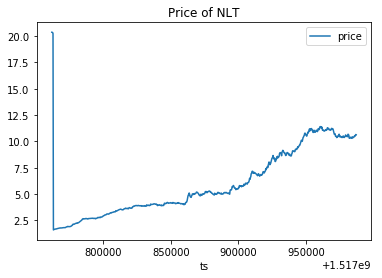

In [13]:
pd.DataFrame(res).plot(x='ts', y='price', title="Price of NLT")

In [28]:
pd.DataFrame(res)

,ARK,ELF,EOS,ETH,INS,IOST,MANA,OMG,price,ts
0,57.997137,95.000000,68.998417,63.999984,84.000000,53.000000,11.000000,62.998875,3.491560,1.517762e+09
1,294.963644,94.999684,179.100173,63.999984,83.999856,53.000000,10.999479,148.713103,0.090232,1.517762e+09
2,294.955161,94.999684,179.097786,64.031002,83.995939,53.000000,280.940806,148.711564,2.659125,1.517762e+09
3,476.110786,94.999582,263.043123,64.945838,377.735401,52.998021,280.936518,213.875491,0.039505,1.517763e+09
4,476.110765,103.376590,263.043118,64.945838,377.735375,344.231624,280.935980,213.875488,0.005299,1.517763e+09
5,476.476545,103.376459,263.211672,64.947674,378.313746,344.231624,297.008972,214.007464,0.062094,1.517763e+09
6,480.677805,116.291480,265.168947,64.968961,384.986424,344.231624,483.916577,215.537511,1.397860,1.517764e+09
7,575.618332,407.423911,308.982287,65.444424,535.242361,344.225915,483.913179,249.760675,0.032245,1.517764e+09
8,575.618330,407.423908,308.982287,65.444424,535.242359,578.042082,483.913128,249.760674,0.000499,1.517764e+09
9,575.652220,407.527113,308.997852,65.444594,535.295189,578.042082,485.424440,249.772866,0.056057,1.517764e+09


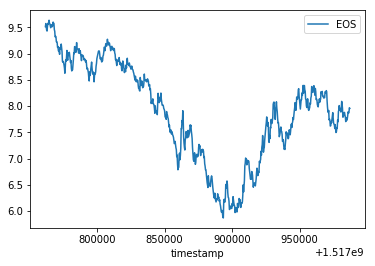

In [68]:
m.plot(x='timestamp', y='EOS')

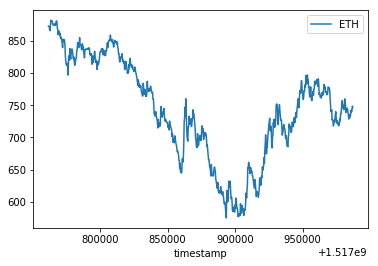

In [69]:
m.plot(x='timestamp', y='ETH')